In [ ]:
import pandas as pd
import numpy as np
import io
from google.colab import files
from google.colab import drive
from matplotlib import pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
#uploading the required files
uploaded = files.upload()
X_data_frame = pd.read_csv(io.BytesIO(uploaded['heart.csv']))

Saving heart.csv to heart (1).csv


In [ ]:
X_data_frame.head() #checking the categories

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
X_data_frame.tail(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


There are 303 samples

age

sex

chest pain type (4 values)

resting blood pressure

serum cholestoral in mg/dl

fasting blood sugar > 120 mg/dl

resting electrocardiographic results (values 0,1,2)

maximum heart rate achieved

exercise induced angina

oldpeak = ST depression induced by exercise relative to rest

the slope of the peak exercise ST segment

number of major vessels (0-3) colored by flourosopy

thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [ ]:
X_data_frame.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#calculating the percentage of people with disease and free from disease
Diseasefree = len(X_data_frame[X_data_frame.target == 0])
HaveDisease = len(X_data_frame[X_data_frame.target == 1])
print("Percentage that have Heart Disease: {:.2f}%",((Diseasefree / (len(X_data_frame.target))*100)))
print("Percentage of Patients that dont Heart Disease: {:.2f}%",((HaveDisease / (len(X_data_frame.target))*100)))



Percentage that have Heart Disease: {:.2f}% 45.54455445544555
Percentage of Patients that dont Heart Disease: {:.2f}% 54.45544554455446


In [ ]:
#converting categorical variables to dummy variables
cp = pd.get_dummies(X_data_frame['cp'], prefix = "cp")
th = pd.get_dummies(X_data_frame['thal'], prefix = "thal")
sl = pd.get_dummies(X_data_frame['slope'], prefix = "slope")
frames = [X_data_frame, cp, th, sl]
X_data_frame = pd.concat(frames, axis = 1)
X_data_frame.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0,0,0,0,0,1,0,0,0,1


In [ ]:
#after converting it into categorical variables, dropping those variables
X_data_frame = X_data_frame.drop(columns = ['cp', 'thal', 'slope'])
X_data_frame.head()
y = X_data_frame.target.values
x_data = X_data_frame.drop(['target'], axis = 1)
#checking what the data looks like
print(x_data)


     age  sex  trestbps  chol  fbs  ...  thal_2  thal_3  slope_0  slope_1  slope_2
0     63    1       145   233    1  ...       0       0        1        0        0
1     37    1       130   250    0  ...       1       0        1        0        0
2     41    0       130   204    0  ...       1       0        0        0        1
3     56    1       120   236    0  ...       1       0        0        0        1
4     57    0       120   354    0  ...       1       0        0        0        1
..   ...  ...       ...   ...  ...  ...     ...     ...      ...      ...      ...
298   57    0       140   241    0  ...       0       1        0        1        0
299   45    1       110   264    0  ...       0       1        0        1        0
300   68    1       144   193    1  ...       0       1        0        1        0
301   57    1       130   131    0  ...       0       1        0        1        0
302   57    0       130   236    0  ...       1       0        0        1        0

[30

In [ ]:
#normalising the values of x so that the cluster isnt widely spread out
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [ ]:
#splitting the data into testing and training sets
x_tr, x_te, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)


In [ ]:
# Let us convert data frame to numpy array
x_train = (x_tr).to_numpy()
x_test = (x_te).to_numpy()



In [ ]:
N=303
M=len(x_train) #training
T=len(x_test) # testing
p=4
K=math.ceil(math.sqrt(N))
print(K)
print(M,T)


18
242 61


In [ ]:
def knearestneighbors(t,m,x_tes,x_tra,kk,y_tra):
  test_label_pred=[]  
  for i in range(0,t):#test points
    assign=[]
    P=x_tes[i]
    for j in range(0,m):#cluster points
      Q=x_tra[j]

      d=np.linalg.norm(P-Q)#calculating distance between the points
      assign.append([d,y_tra[j]])#corresponding label of that point
    assigned=sorted(assign, key=lambda x: x[0]) #arraning the points in order of distances from the point i
  #print(assigned)
    negative=0
    positive=0
    for k in range(0,kk):

      if assigned[k][1]==1:
        positive=positive+1
      elif assigned[k][1]==0:
        negative=negative+1
    #checking the majority of labels out of the K nearest neighbors. 
    if positive>negative:
      test_label_pred.append(1)
    elif negative>positive:
      test_label_pred.append(0)
    else: #incase there are equal numbers with either labels, assigning the point the label of the point closest to it 
      test_label_pred.append(assigned[0][1])
  test_pre=np.array(test_label_pred) 
  return(test_pre)


In [ ]:

assign=[]
acc_k=[]
while K>=1:
  #values of K ranging from 1-18
  test_pred=knearestneighbors(T,M,x_test,x_train,K,y_train)
  acc=0
  wro=0
   
  for l in range(0,len(y_test)):
    if y_test[l]==test_pred[l]:
      acc=acc+1
    elif y_test[l]!=test_pred[l]:
      wro=wro+1
  acc_k.append([acc/(acc+wro),K])#checking for the accuracy
  K=K-1
print(acc_k)



[[0.8524590163934426, 18], [0.8360655737704918, 17], [0.8360655737704918, 16], [0.8360655737704918, 15], [0.8360655737704918, 14], [0.8360655737704918, 13], [0.8524590163934426, 12], [0.8688524590163934, 11], [0.8852459016393442, 10], [0.8688524590163934, 9], [0.8852459016393442, 8], [0.8852459016393442, 7], [0.8688524590163934, 6], [0.8524590163934426, 5], [0.8360655737704918, 4], [0.8852459016393442, 3], [0.8032786885245902, 2], [0.8032786885245902, 1]]


In [ ]:
acc_sorted=sorted(acc_k, key=lambda x: x[1])#sorting data according to K values
x_acc=[]
y_acc=[]
for [a,b] in acc_sorted:
  x_acc.append(b)
  y_acc.append(a)
#print(x_acc)
#print(y_acc)

In [ ]:
#doing the above with pre- existing libraries in python

In [ ]:
K=math.ceil(math.sqrt(N))
k=1
y_sklearn=[]
k_=[]
while k<=K:
  
  knn = KNeighborsClassifier(n_neighbors = k)  #  k nearest neighbors
  knn.fit(x_tr, y_train)#training set
  prediction = knn.predict(x_te)#predicting using the giving test set
  y_sklearn.append(knn.score(x_te, y_test))
  k_.append(k)
  k=k+1

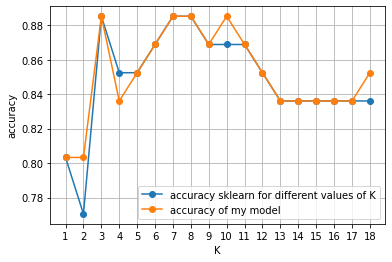

In [ ]:
plt.plot(k_, y_sklearn ,marker='o')
plt.plot(x_acc, y_acc  ,marker='o')
plt.xticks(np.arange(1,19,1))
plt.grid()
plt.xlabel('K')
plt.ylabel('accuracy')
plt.legend(['accuracy sklearn for different values of K','accuracy of my model'],loc="lower right")

plt.show()

It can be observed that my model and the sklearn model differ only at the even values which can be attributed to the way I resolved the ties. K= even are prone to ties and in such cases I assigned the label that was closest to the point

It can be oberved that the optimal values of K are 3,7,8

In [ ]:
K=7
#confusion matrix for K=7 which has the highest accuracy
test_pred_=knearestneighbors(T,M,x_test,x_train,K,y_train)  
TP=0
TN=0
FP=0
FN=0
for i in range(0,T):
  if test_pred_[i]==y_test[i]==1:
    TP=TP+1
  elif test_pred_[i]==y_test[i]==0:
    TN=TN+1
  elif test_pred_[i]==0 and y_test[i]==1:
    FN=FN+1
  elif test_pred_[i]==1 and y_test[i]==0:
    FP=FP+1
print('Accuracy is ',(TN+TP)/(TN+TP+FN+FP))
print('Precision is ',TP/(TP+FP))
print('Sensitivity is ',TP/(TP+FN))
print('Specificity is ',TN/(TN+FP))


Accuracy is  0.8852459016393442
Precision is  0.9090909090909091
Sensitivity is  0.8823529411764706
Specificity is  0.8888888888888888


In [ ]:
#randomly initialising weights and bias
weights=np.random.rand(21)
bias=np.random.rand(1)
#print(x_train[1])
def sigmoid(x):
  y=1/(1+np.exp(-x))
  return y
  #computing (beta transpose X+bias)
def tra(x,wei,bia):
  g=np.dot(x,wei.T)+bia
  return g
alpha=1.2#learning rate
cost_train=[]
cost_test=[]
#print(tra(x_train[1],weights,bias))
#number of iterations-100 to update the weights by gradient descent
for k in range(0,100):
  for j in range(0,len(weights)):
    beta_up=0
    for i in range(0,len(y_train)):
      h=sigmoid(tra(x_train[i],weights,bias)[0])
      
      #print(h)
      #print(y_train[i])
      beta_up=beta_up-alpha*((h)-y_train[i])*(x_train[i][j])
    weights[j]=weights[j]+beta_up/len(y_train)
  #for the bias
  bias_up=0
  for i in range(0,len(y_train)):
    h=sigmoid(tra(x_train[i],weights,bias)[0])
    bias_up=bias_up-alpha*((h)-y_train[i])
  bias=bias+bias_up/len(y_train)

  #computing training cost
  coss=0
  for i in range(0,len(y_train)):
    h=sigmoid(tra(x_train[i],weights,bias)[0])
    #print(h)
    #print(y_train[i])
    coss=coss-(y_train[i]*np.log(h)+(1-y_train[i])*np.log(1-h))
    #computing test cost
  cosv=0
  for i in range(0,len(y_test)):
    h=sigmoid(tra(x_test[i],weights,bias)[0])
    cosv=cosv-(y_test[i]*np.log(h)+(1-y_test[i])*np.log(1-h))
    

  cost_train.append(coss/len(y_train))
  cost_test.append(cosv/len(y_test))

print(cost_train) 
print(cost_test) 


[0.696515265740988, 0.5378349683277924, 0.49745337937886736, 0.477338130699642, 0.46348386392532215, 0.4529594216025859, 0.44462853884730374, 0.4378549645904349, 0.43222843522927973, 0.4274683590471383, 0.42337625018956654, 0.41980822128923806, 0.41665786009482286, 0.41384510710061295, 0.41130881093495225, 0.40900162502257414, 0.4068864378717842, 0.4049338316965945, 0.40312024453015416, 0.4014266221846206, 0.3998374167415241, 0.3983398337308145, 0.39692326013553425, 0.39557882546821743, 0.3942990618677223, 0.3930776386376555, 0.3919091532831869, 0.3907889658088445, 0.38971306641549547, 0.388677969182005, 0.38768062610916815, 0.38671835722811043, 0.3857887934630339, 0.38488982968079893, 0.38401958592247437, 0.383176375241498, 0.38235867690318903, 0.3815651139557587, 0.3807944343818128, 0.3800454951950441, 0.3793172489694416, 0.37860873238543946, 0.3779190564546775, 0.3772473981468152, 0.37659299319146367, 0.3759551298683188, 0.37533314363100156, 0.37472641243649063, 0.374134352673541, 0

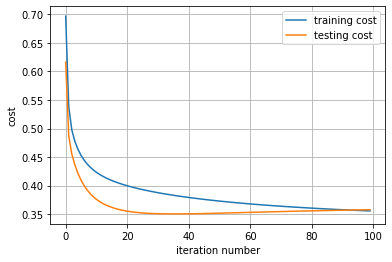

In [ ]:
#plots
ep=[]
for i in range(0,100):
  ep.append(i)
plt.plot(ep, cost_train )
plt.plot(ep, cost_test  )
plt.grid()
plt.xlabel('iteration number')
plt.ylabel('cost')
plt.legend(['training cost','testing cost'],loc="upper right")

plt.show()

the training cost,testing cost converge at 100 iterations

In [ ]:
#predicted labels

y_prediction=[]   
for i in range(0,len(y_test)):
  h=sigmoid(tra(x_test[i],weights,bias)[0])
  if h <= 0.5:
    y_prediction.append(0)
  else:
    y_prediction.append(1)

acc=0
wro=0
for i in range(0,len(y_test)):
  if y_test[i]==y_prediction[i]:
    acc=acc+1
  else:
    wro=wro+1
print(acc/(acc+wro))#accuracy percentage of my model


0.8688524590163934


In [ ]:
#pre exisitng model
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train,y_train)
acc = lr.score(x_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {}%".format(acc))


Test Accuracy 86.88524590163934%


In [ ]:
#confusion matrix for my model of logistic regression
TP=0
TN=0
FP=0
FN=0
for i in range(0,len(y_test)):
  if y_prediction[i]==y_test[i]==1:
    TP=TP+1
  elif y_prediction[i]==y_test[i]==0:
    TN=TN+1
  elif y_prediction[i]==0 and y_test[i]==1:
    FN=FN+1
  elif y_prediction[i]==1 and y_test[i]==0:
    FP=FP+1
print('Accuracy is ',(TN+TP)/(TN+TP+FN+FP))
print('Precision is ',TP/(TP+FP))
print('Recall is ',TP/(TP+FN))
print('Specificity is ',TN/(TN+FP))

Accuracy is  0.8688524590163934
Precision is  0.8823529411764706
Sensitivity is  0.8823529411764706
Specificity is  0.8518518518518519
